**IMPORTING THE LIBRARIES**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**IMPORTING THE DATA**

In [2]:
df1 =  pd.read_csv('application_data.csv.zip')
df2 =  pd.read_csv('previous_application.csv.zip')

In [3]:
df3 = pd.merge(df1,df2,on='SK_ID_CURR',how='outer',indicator=True)

In [4]:
df3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,_merge
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,both
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,both
2,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,both
3,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,both
4,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,both


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686668 entries, 0 to 1686667
Columns: 159 entries, SK_ID_CURR to _merge
dtypes: category(1), float64(125), int64(1), object(32)
memory usage: 2.0+ GB


In [6]:
df3.shape

(1686668, 159)

In [7]:
df3.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       '_merge'],
      dtype='object', length=159)

In [8]:
df3.isnull().sum()

SK_ID_CURR                        0
TARGET                       256513
NAME_CONTRACT_TYPE_x         256513
CODE_GENDER                  256513
FLAG_OWN_CAR                 256513
                              ...  
DAYS_LAST_DUE_1ST_VERSION    689519
DAYS_LAST_DUE                689519
DAYS_TERMINATION             689519
NFLAG_INSURED_ON_APPROVAL    689519
_merge                            0
Length: 159, dtype: int64

In [9]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1686668.0,278349.024179,102806.565533,100001.0,189325.0,278689.0,367487.0,456255.0
TARGET,1430155.0,0.086242,0.280722,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,1430155.0,0.403887,0.716518,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,1430155.0,173603.622588,198330.285287,25650.0,112500.0,157500.0,211500.0,117000000.0
AMT_CREDIT_x,1430155.0,589338.592951,387420.355419,45000.0,270000.0,508495.5,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
DAYS_FIRST_DUE,997149.0,13826.269337,72444.869708,-2892.0,-1628.0,-831.0,-411.0,365243.0
DAYS_LAST_DUE_1ST_VERSION,997149.0,33767.774054,106857.034789,-2801.0,-1242.0,-361.0,129.0,365243.0
DAYS_LAST_DUE,997149.0,76582.403064,149647.415123,-2889.0,-1314.0,-537.0,-74.0,365243.0
DAYS_TERMINATION,997149.0,81992.343838,153303.516729,-2874.0,-1270.0,-499.0,-44.0,365243.0


In [10]:
df3.keys()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       '_merge'],
      dtype='object', length=159)

# UNIVARIATE ANALYSIS

In [11]:
df3['NAME_PORTFOLIO'].unique()

array(['POS', 'Cash', 'XNA', 'Cards', nan, 'Cars'], dtype=object)

In [12]:
df3['NAME_PORTFOLIO'].value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

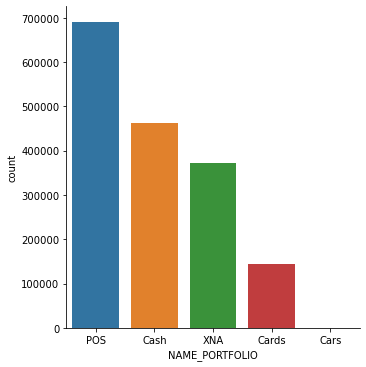

In [13]:
sns.catplot(x='NAME_PORTFOLIO', data=df3,kind='count')

In [14]:
df3['NAME_PRODUCT_TYPE']

0             XNA
1          x-sell
2             XNA
3             XNA
4             XNA
            ...  
1686663       XNA
1686664       XNA
1686665       XNA
1686666    x-sell
1686667    x-sell
Name: NAME_PRODUCT_TYPE, Length: 1686668, dtype: object

In [15]:
df3['NAME_PRODUCT_TYPE'].unique()

array(['XNA', 'x-sell', 'walk-in', nan], dtype=object)

In [16]:
df3['NAME_PRODUCT_TYPE'].value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

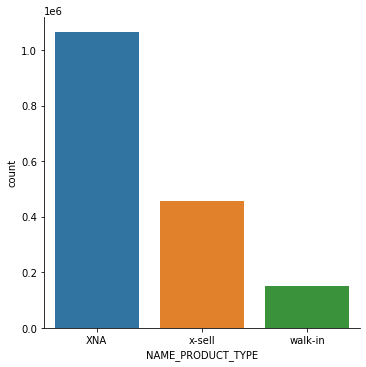

In [17]:
sns.catplot(x='NAME_PRODUCT_TYPE', data=df3,kind='count')

In [18]:
df3['CHANNEL_TYPE']

0                            Stone
1          Credit and cash offices
2                            Stone
3                     Country-wide
4                 Regional / Local
                    ...           
1686663               Country-wide
1686664               Country-wide
1686665               Country-wide
1686666    Credit and cash offices
1686667    Credit and cash offices
Name: CHANNEL_TYPE, Length: 1686668, dtype: object

In [19]:
df3['CHANNEL_TYPE'].unique()

array(['Stone', 'Credit and cash offices', 'Country-wide',
       'Regional / Local', 'AP+ (Cash loan)', 'Contact center', nan,
       'Channel of corporate sales', 'Car dealer'], dtype=object)

In [20]:
df3['CHANNEL_TYPE'].value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

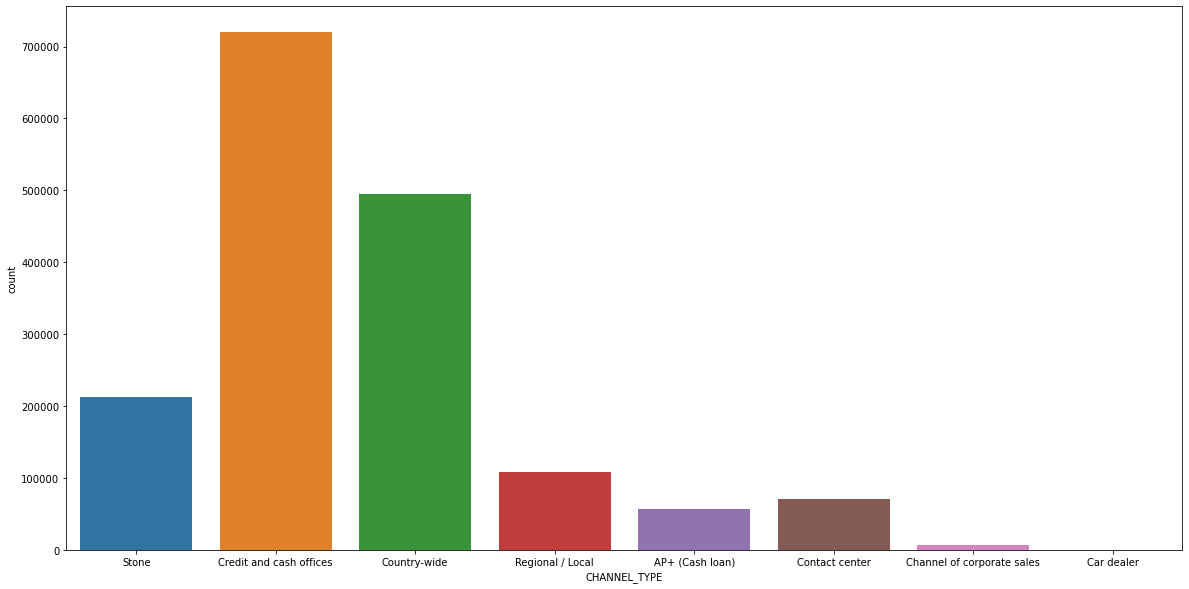

In [21]:
sns.countplot(df3['CHANNEL_TYPE'])
fig = plt.gcf()
fig.set_size_inches(20,10)

In [22]:
df3['SELLERPLACE_AREA']

0           500.0
1            -1.0
2          1400.0
3           200.0
4            30.0
            ...  
1686663      35.0
1686664     100.0
1686665      20.0
1686666      -1.0
1686667       0.0
Name: SELLERPLACE_AREA, Length: 1686668, dtype: float64

In [23]:
df3['SELLERPLACE_AREA'].value_counts()

-1.0         762675
 0.0          60523
 50.0         37401
 30.0         34423
 20.0         33840
              ...  
 3814.0           1
 990.0            1
 256099.0         1
 1822.0           1
 2332.0           1
Name: SELLERPLACE_AREA, Length: 2097, dtype: int64

In [24]:
df3['NAME_SELLER_INDUSTRY']

0               Auto technology
1                           XNA
2                     Furniture
3          Consumer electronics
4                  Connectivity
                   ...         
1686663            Connectivity
1686664    Consumer electronics
1686665            Connectivity
1686666                     XNA
1686667                     XNA
Name: NAME_SELLER_INDUSTRY, Length: 1686668, dtype: object

In [25]:
df3['NAME_SELLER_INDUSTRY'].unique()

array(['Auto technology', 'XNA', 'Furniture', 'Consumer electronics',
       'Connectivity', 'Construction', 'Clothing', nan, 'Industry',
       'Tourism', 'Jewelry', 'MLM partners'], dtype=object)

In [26]:
df3['NAME_SELLER_INDUSTRY'].value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

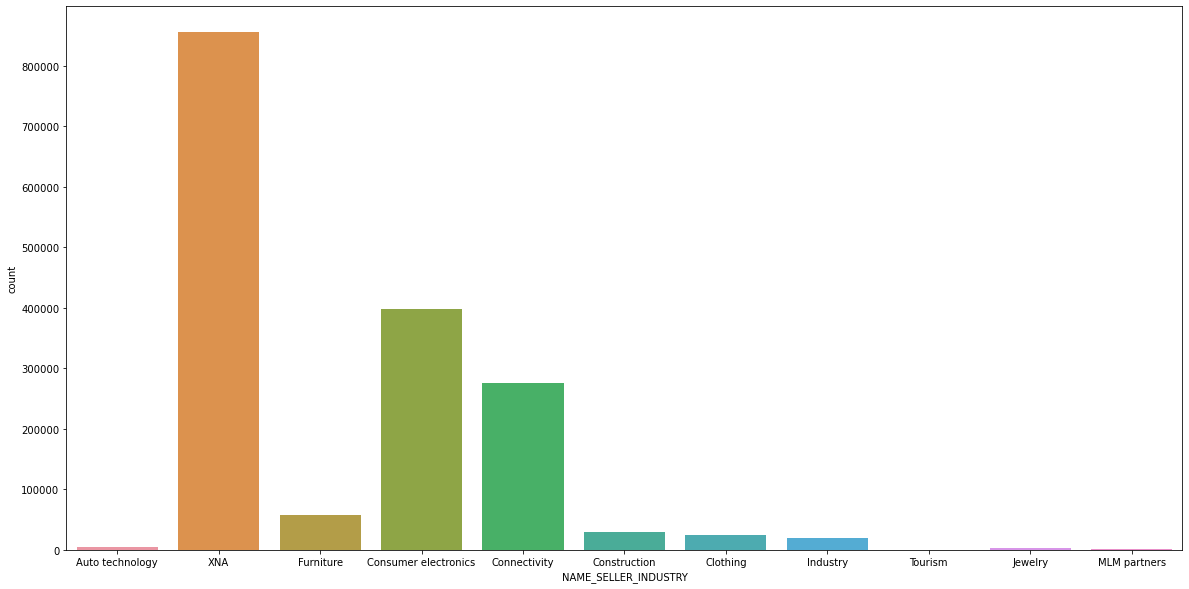

In [27]:
sns.countplot(df3['NAME_SELLER_INDUSTRY'])
fig = plt.gcf()
fig.set_size_inches(20,10)

In [28]:
df3['CNT_PAYMENT']

0          24.0
1          12.0
2           6.0
3          12.0
4           4.0
           ... 
1686663    10.0
1686664     6.0
1686665    10.0
1686666    12.0
1686667     6.0
Name: CNT_PAYMENT, Length: 1686668, dtype: float64

In [29]:
df3['CNT_PAYMENT'].unique()

array([24., 12.,  6.,  4., 48., nan,  0., 18., 10., 30.,  8., 16., 36.,
        5., 60., 42., 14., 54., 20.,  3., 15., 72.,  9.,  7., 11., 22.,
       17., 84., 13., 29., 59., 53., 40., 23., 26., 28., 32., 34., 38.,
       19., 66., 35., 33., 39., 44., 21., 47., 41., 45., 46.])

In [30]:
df3['CNT_PAYMENT'].value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
29.0         8
28.0         8
19.0         6
32.0         6
59.0         4
34.0         4
21.0         3
45.0         3
41.0         3
47.0         3
46.0         2
44.0         2
39.0         2
38.0         2
40.0         1
53.0         1
33.0         1
Name: CNT_PAYMENT, dtype: int64

In [31]:
df3['NAME_YIELD_GROUP']

0          low_normal
1          low_normal
2              middle
3              middle
4              middle
              ...    
1686663    low_normal
1686664    low_normal
1686665    low_normal
1686666        middle
1686667          high
Name: NAME_YIELD_GROUP, Length: 1686668, dtype: object

In [32]:
df3['NAME_YIELD_GROUP'].unique()

array(['low_normal', 'middle', 'XNA', 'high', 'low_action', nan],
      dtype=object)

In [33]:
df3['NAME_YIELD_GROUP'].value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

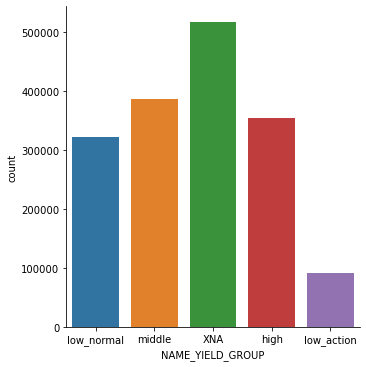

In [34]:
sns.catplot(x='NAME_YIELD_GROUP', data=df3,kind='count')

In [35]:
df3['PRODUCT_COMBINATION']

0              POS other with interest
1                     Cash X-Sell: low
2           POS industry with interest
3          POS household with interest
4          POS mobile without interest
                      ...             
1686663    POS mobile without interest
1686664        POS other with interest
1686665    POS mobile without interest
1686666            Cash X-Sell: middle
1686667              Cash Street: high
Name: PRODUCT_COMBINATION, Length: 1686668, dtype: object

In [36]:
df3['PRODUCT_COMBINATION'].unique()

array(['POS other with interest', 'Cash X-Sell: low',
       'POS industry with interest', 'POS household with interest',
       'POS mobile without interest', 'Card Street', 'Card X-Sell',
       'Cash X-Sell: high', 'Cash', 'Cash Street: high',
       'Cash X-Sell: middle', 'POS mobile with interest',
       'POS household without interest', 'POS industry without interest',
       'Cash Street: low', nan, 'Cash Street: middle',
       'POS others without interest'], dtype=object)

In [37]:
df3['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'POS other with interest'),
  Text(1, 0, 'Cash X-Sell: low'),
  Text(2, 0, 'POS industry with interest'),
  Text(3, 0, 'POS household with interest'),
  Text(4, 0, 'POS mobile without interest'),
  Text(5, 0, 'Card Street'),
  Text(6, 0, 'Card X-Sell'),
  Text(7, 0, 'Cash X-Sell: high'),
  Text(8, 0, 'Cash'),
  Text(9, 0, 'Cash Street: high'),
  Text(10, 0, 'Cash X-Sell: middle'),
  Text(11, 0, 'POS mobile with interest'),
  Text(12, 0, 'POS household without interest'),
  Text(13, 0, 'POS industry without interest'),
  Text(14, 0, 'Cash Street: low'),
  Text(15, 0, 'Cash Street: middle'),
  Text(16, 0, 'POS others without interest')])

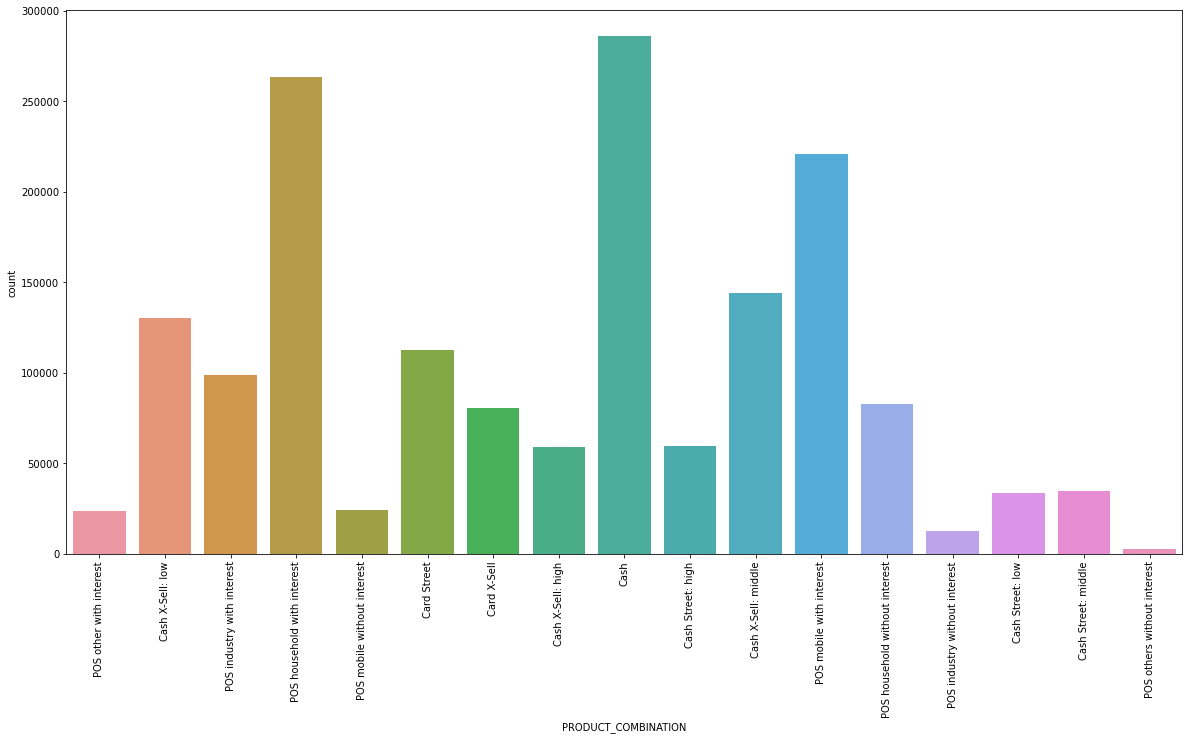

In [38]:
sns.countplot(df3['PRODUCT_COMBINATION'])
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)

In [39]:
df3['DAYS_FIRST_DRAWING']

0          365243.0
1          365243.0
2          365243.0
3          365243.0
4          365243.0
             ...   
1686663    365243.0
1686664    365243.0
1686665    365243.0
1686666    365243.0
1686667    365243.0
Name: DAYS_FIRST_DRAWING, Length: 1686668, dtype: float64

In [40]:
df3['DAYS_FIRST_DRAWING'].value_counts()

 365243.0    934444
-228.0          123
-224.0          121
-212.0          121
-223.0          119
              ...  
-1599.0           1
-1819.0           1
-1823.0           1
-1825.0           1
-1911.0           1
Name: DAYS_FIRST_DRAWING, Length: 2838, dtype: int64

In [41]:
df3['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

In [42]:
df3['DAYS_FIRST_DUE']

0          -565.0
1          -716.0
2          -797.0
3         -2310.0
4          -784.0
            ...  
1686663    -334.0
1686664    -212.0
1686665    -268.0
1686666    -972.0
1686667   -2755.0
Name: DAYS_FIRST_DUE, Length: 1686668, dtype: float64

In [43]:
df3['DAYS_FIRST_DUE'].value_counts()

 365243.0    40645
-334.0         772
-509.0         760
-208.0         751
-330.0         750
             ...  
-2889.0         86
-2890.0         73
-2891.0         55
-2.0            14
-2892.0          9
Name: DAYS_FIRST_DUE, Length: 2892, dtype: int64

In [44]:
df3['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [45]:
df3['DAYS_LAST_DUE_1ST_VERSION']

0           125.0
1          -386.0
2          -647.0
3         -1980.0
4          -694.0
            ...  
1686663     -64.0
1686664     -62.0
1686665       2.0
1686666    -642.0
1686667   -2605.0
Name: DAYS_LAST_DUE_1ST_VERSION, Length: 1686668, dtype: float64

In [46]:
df3['DAYS_LAST_DUE_1ST_VERSION'].value_counts()

365243.0    93864
9.0           720
8.0           706
0.0           705
5.0           702
            ...  
1800.0          1
2389.0          1
1947.0          1
2090.0          1
2032.0          1
Name: DAYS_LAST_DUE_1ST_VERSION, Length: 4605, dtype: int64

In [47]:
df3['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [48]:
df3['DAYS_LAST_DUE']

0             -25.0
1            -536.0
2            -647.0
3           -1980.0
4            -724.0
             ...   
1686663       -94.0
1686664      -122.0
1686665    365243.0
1686666      -642.0
1686667     -2605.0
Name: DAYS_LAST_DUE, Length: 1686668, dtype: float64

In [49]:
df3['DAYS_LAST_DUE'].value_counts()

 365243.0    211221
-245.0          658
-188.0          650
-239.0          642
-167.0          638
              ...  
-2849.0           1
-2865.0           1
-2836.0           1
-2888.0           1
-2833.0           1
Name: DAYS_LAST_DUE, Length: 2873, dtype: int64

In [50]:
df3['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

In [51]:
df3['DAYS_TERMINATION']

0             -17.0
1            -527.0
2            -639.0
3           -1976.0
4            -714.0
             ...   
1686663    365243.0
1686664      -115.0
1686665    365243.0
1686666      -636.0
1686667     -2598.0
Name: DAYS_TERMINATION, Length: 1686668, dtype: float64

In [52]:
df3['DAYS_TERMINATION'].value_counts()

 365243.0    225913
-233.0          786
-184.0          770
-170.0          770
-163.0          769
              ...  
-2807.0           1
-2829.0           1
-2844.0           1
-2809.0           1
-2824.0           1
Name: DAYS_TERMINATION, Length: 2830, dtype: int64

In [53]:
df3['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [54]:
df3['NFLAG_INSURED_ON_APPROVAL']

0          0.0
1          1.0
2          0.0
3          1.0
4          0.0
          ... 
1686663    0.0
1686664    1.0
1686665    0.0
1686666    1.0
1686667    0.0
Name: NFLAG_INSURED_ON_APPROVAL, Length: 1686668, dtype: float64

In [55]:
df3['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

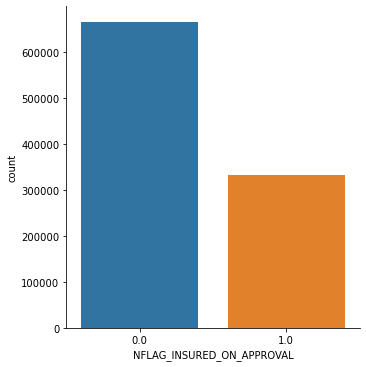

In [56]:
sns.catplot(x='NFLAG_INSURED_ON_APPROVAL', data=df3,kind='count')

In [57]:
!pip install altair
import altair as alt

In [58]:
chart1 = alt.Chart(df3).mark_bar()\
            .encode(alt.X("CODE_GENDER"), y='count()')

In [59]:
chart1

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

In [60]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [61]:
df3['AMT_INCOME_TOTAL'].describe()

count    1.430155e+06
mean     1.736036e+05
std      1.983303e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x29c802a9c10>,
 'caps': [<matplotlib.lines.Line2D at 0x29c802b6310>,
 'boxes': [<matplotlib.lines.Line2D at 0x29c802a98b0>],
 'medians': [<matplotlib.lines.Line2D at 0x29c802b69d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29c802b6d30>],
 'means': []}

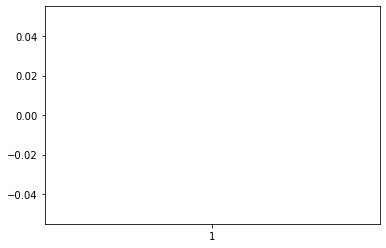

In [62]:
plt.boxplot(df3['AMT_INCOME_TOTAL'])

In [63]:
df3.groupby(by=['NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL','TARGET']).count()

SK_ID_CURR  \
NAME_EDUCATION_TYPE           AMT_INCOME_TOTAL TARGET               
Academic degree               49500.0          0.0              3   
                              67500.0          0.0              7   
                              76500.0          0.0              3   
                              81000.0          0.0              4   
                              90000.0          0.0             22   
...                                                           ...   
Secondary / secondary special 2930026.5        0.0              2   
                              3600000.0        0.0              9   
                              4500000.0        0.0              3   
                              18000090.0       0.0              3   
                              117000000.0      1.0              3   

                                                       NAME_CONTRACT_TYPE_x  \
NAME_EDUCATION_TYPE           AMT_INCOME_TOTAL TARGET                         
Academic degree               49500.0          0.0                        3   
                              67500.0          0.0                        7   
                              76500.0          0.0                        3   
                              81000.0          0.0                        4   
                              90000.0          0.0                       22   
...                                                                     ...   
Secondary / secondary special 2930026.5        0.0                        2   
                              3600000.0        0.0                        9   
                              4500000.0        0.0                        3   
                              18000090.0       0.0                        3   
                              117000000.0      1.0                        3   

                                                       CODE_GENDER  \
NAME_EDUCATION_TYPE           AMT_INCOME_TOTAL TARGET                
Academic degree               49500.0          0.0               3   
                              67500.0          0.0               7   
                              76500.0          0.0               3   
                              81000.0          0.0               4   
                              90000.0          0.0              22   
...                                                            ...   
Secondary / secondary special 2930026.5        0.0               2   
                              3600000.0        0.0               9   
                              4500000.0        0.0               3   
                              18000090.0       0.0               3   
                              117000000.0      1.0               3   

                                                       FLAG_OWN_CAR  \
NAME_EDUCATION_TYPE           AMT_INCOME_TOTAL TARGET                 
Academic degree               49500.0          0.0                3   
                              67500.0          0.0                7   
                              76500.0          0.0                3   
                              81000.0          0.0                4   
                              90000.0          0.0               22   
...                                                             ...   
Secondary / secondary special 2930026.5        0.0                2   
                              3600000.0        0.0                9   
                              4500000.0        0.0                3   
                              18000090.0       0.0                3   
                              117000000.0      1.0                3   

                                                       FLAG_OWN_REALTY  \
NAME_EDUCATION_TYPE           AMT_INCOME_TOTAL TARGET                    
Academic degree               49500.0          0.0                   3   
                              67500.0          0.0                   7  

<AxesSubplot:>

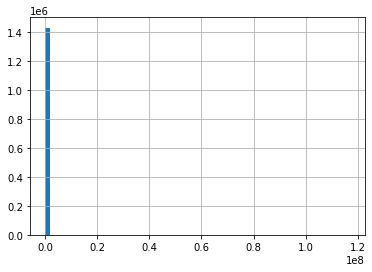

In [64]:
df3['AMT_INCOME_TOTAL'].hist(bins=70)

In [65]:
df3['Age']=df3['DAYS_BIRTH']//365

In [66]:
pd.crosstab(index=df3['AMT_INCOME_TOTAL'], columns=df3['Age'])

Age,-70.0,-69.0,-68.0,-67.0,-66.0,-65.0,-64.0,-63.0,-62.0,-61.0,...,-30.0,-29.0,-28.0,-27.0,-26.0,-25.0,-24.0,-23.0,-22.0,-21.0
AMT_INCOME_TOTAL,,,,,,,,,,,,,,,,,,,,,
25650.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26100.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26460.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26550.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27000.0,0,0,1,0,0,0,3,4,12,6,...,4,1,4,0,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9000000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13500000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df3.groupby('Age')[['AMT_INCOME_TOTAL']].mean()

,AMT_INCOME_TOTAL
Age,
-70.0,154070.156250
-69.0,125271.517523
-68.0,125521.197493
-67.0,126787.994045
-66.0,132348.515449
-65.0,154609.903544
-64.0,158560.082612
-63.0,153435.898802
-62.0,154486.141042


In [68]:
age=pd.DataFrame(df3.groupby("Age")[["AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","ORGANIZATION_TYPE",'AMT_APPLICATION','AMT_DOWN_PAYMENT']].mean())
age.head()

,AMT_INCOME_TOTAL,AMT_APPLICATION,AMT_DOWN_PAYMENT
Age,,,
-70.0,154070.156250,81178.778571,7707.514865
-69.0,125271.517523,97639.485079,5653.358363
-68.0,125521.197493,114214.991335,5488.059337
-67.0,126787.994045,137954.503450,5695.594750
-66.0,132348.515449,172608.433998,5477.916548


In [69]:
age["Count"]=df3.Age.value_counts(dropna=False)

In [70]:
age

,AMT_INCOME_TOTAL,AMT_APPLICATION,AMT_DOWN_PAYMENT,Count
Age,,,,
-70.0,154070.156250,81178.778571,7707.514865,64
-69.0,125271.517523,97639.485079,5653.358363,4965
-68.0,125521.197493,114214.991335,5488.059337,11127
-67.0,126787.994045,137954.503450,5695.594750,11167
-66.0,132348.515449,172608.433998,5477.916548,16765
-65.0,154609.903544,199601.578506,5643.567612,27893
-64.0,158560.082612,205642.317745,6168.342928,27248
-63.0,153435.898802,201633.110579,6213.242171,28286
-62.0,154486.141042,202895.851887,6620.182033,27195


In [71]:
age["Count"]=df3.Age.value_counts(dropna=False) # adding new column to age
age.reset_index(level=0, inplace=True)
age.head()

,Age,AMT_INCOME_TOTAL,AMT_APPLICATION,AMT_DOWN_PAYMENT,Count
0,-70.0,154070.156250,81178.778571,7707.514865,64
1,-69.0,125271.517523,97639.485079,5653.358363,4965
2,-68.0,125521.197493,114214.991335,5488.059337,11127
3,-67.0,126787.994045,137954.503450,5695.594750,11167
4,-66.0,132348.515449,172608.433998,5477.916548,16765


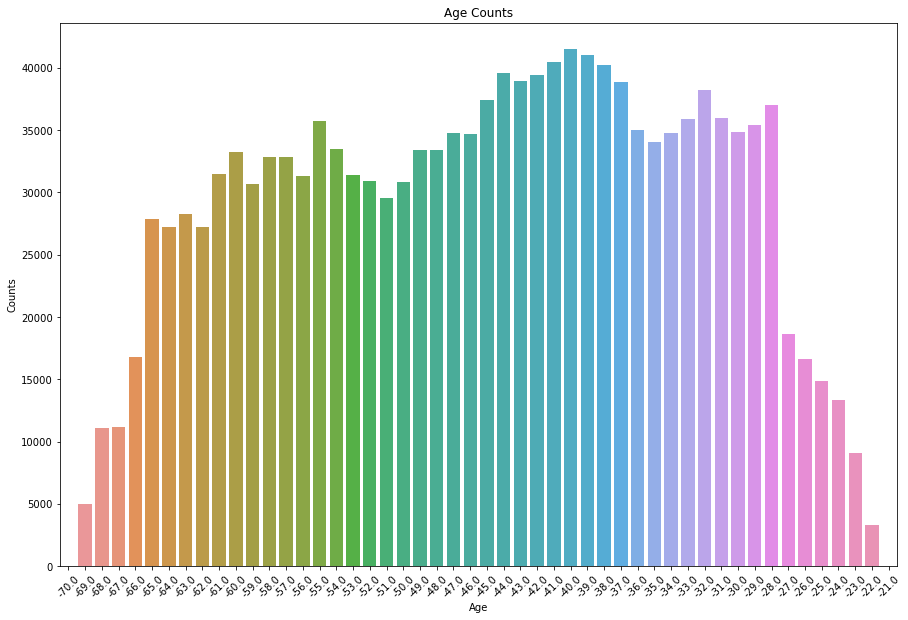

In [72]:
# showing the counts for different ages
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.Count)
plt.xticks(rotation=45)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

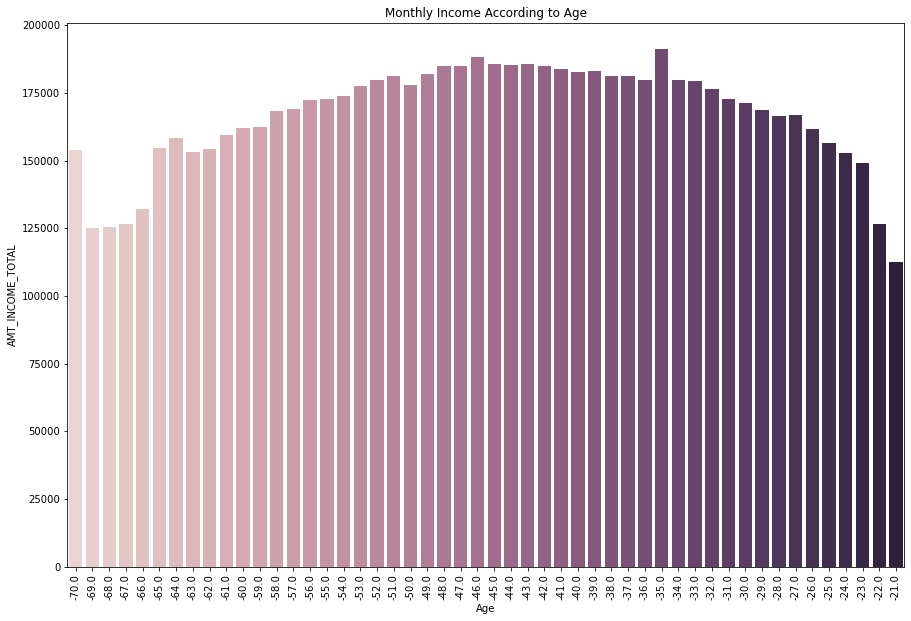

In [73]:
# showing monthly income according to age
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.AMT_INCOME_TOTAL,palette = sns.cubehelix_palette(len(age.index)))
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("AMT_INCOME_TOTAL")
plt.title("Monthly Income According to Age")
plt.show()

In [74]:
income=pd.DataFrame(df3.groupby("ORGANIZATION_TYPE").AMT_INCOME_TOTAL.mean().sort_values(ascending=False))

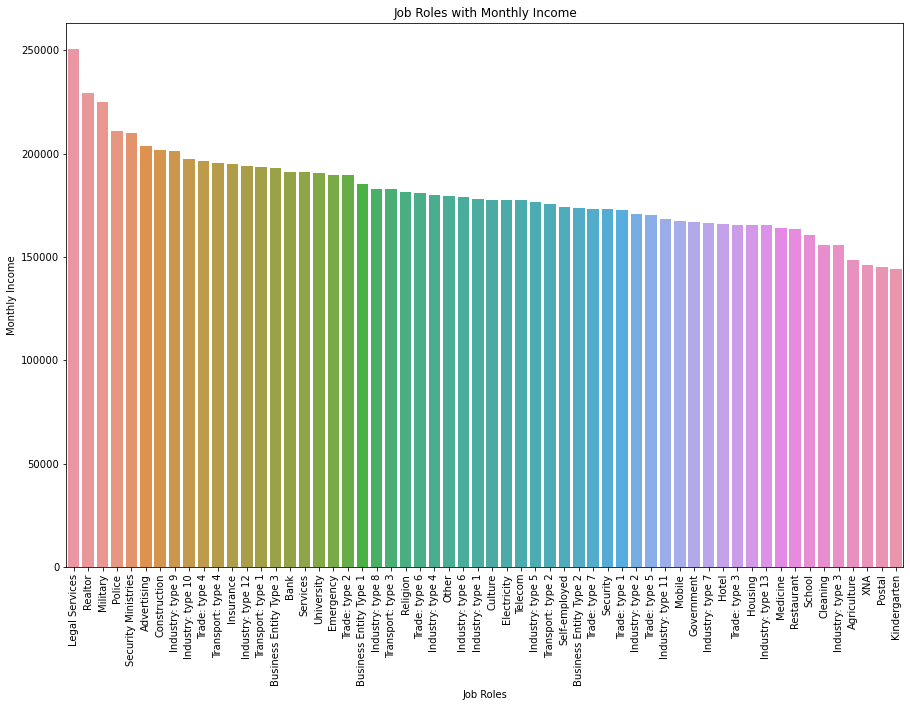

In [75]:
#ing the job roles with their monthly incomes
plt.figure(figsize=(15,10))
ax=sns.barplot(x=income.index,y=income.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)
plt.xlabel("Job Roles")
plt.ylabel("Monthly Income")
plt.title("Job Roles with Monthly Income")
plt.show()

In [76]:
df3['Age']


0         -26.0
1         -46.0
2         -46.0
3         -46.0
4         -53.0
           ... 
1686663     NaN
1686664     NaN
1686665     NaN
1686666     NaN
1686667     NaN
Name: Age, Length: 1686668, dtype: float64

In [77]:
ranges = [-100,-70,-50,-35,-18]
df3['Age_BINS'] = pd.cut(df3['Age'],bins=ranges,precision=0,labels=['Silent','GenX','Boomer','Millennial'])
df3['Age_BINS'].value_counts()

Boomer        562915
GenX          539070
Millennial    328106
Silent            64
Name: Age_BINS, dtype: int64

In [78]:
df3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,_merge,Age,Age_BINS
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,both,-26.0,Millennial
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,both,-46.0,Boomer
2,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,both,-46.0,Boomer
3,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,both,-46.0,Boomer
4,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,both,-53.0,GenX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686663,316831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POS mobile without interest,365243.0,-334.0,-64.0,-94.0,365243.0,0.0,right_only,NaN,NaN
1686664,445110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POS other with interest,365243.0,-212.0,-62.0,-122.0,-115.0,1.0,right_only,NaN,NaN
1686665,424256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POS mobile without interest,365243.0,-268.0,2.0,365243.0,365243.0,0.0,right_only,NaN,NaN
1686666,174832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Cash X-Sell: middle,365243.0,-972.0,-642.0,-642.0,-636.0,1.0,right_only,NaN,NaN


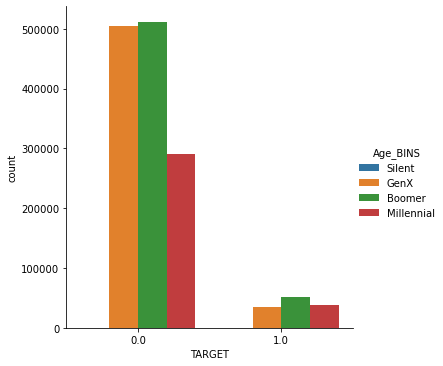

In [79]:
sns.catplot('TARGET', data=df3, hue='Age_BINS', kind='count')

<AxesSubplot:xlabel='NAME_CLIENT_TYPE,Age_BINS,TARGET'>

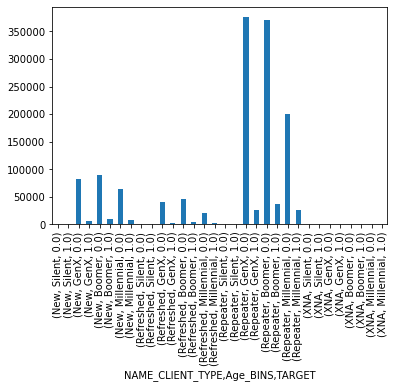

In [80]:
df3.groupby(by=['NAME_CLIENT_TYPE','Age_BINS','TARGET']).count()['SK_ID_CURR'].plot(kind='bar')

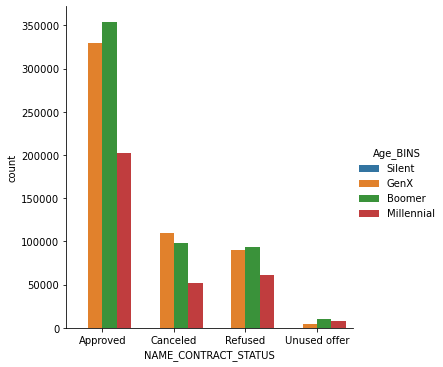

In [81]:
sns.catplot('NAME_CONTRACT_STATUS', data=df3, hue='Age_BINS', kind='count')

In [82]:
df3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,_merge,Age,Age_BINS
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,both,-26.0,Millennial
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,both,-46.0,Boomer
2,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,both,-46.0,Boomer
3,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,both,-46.0,Boomer
4,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,both,-53.0,GenX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686663,316831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POS mobile without interest,365243.0,-334.0,-64.0,-94.0,365243.0,0.0,right_only,NaN,NaN
1686664,445110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POS other with interest,365243.0,-212.0,-62.0,-122.0,-115.0,1.0,right_only,NaN,NaN
1686665,424256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POS mobile without interest,365243.0,-268.0,2.0,365243.0,365243.0,0.0,right_only,NaN,NaN
1686666,174832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Cash X-Sell: middle,365243.0,-972.0,-642.0,-642.0,-636.0,1.0,right_only,NaN,NaN


In [83]:
df3.drop(columns=['_merge'],inplace=True)

In [84]:
df3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Age,Age_BINS
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,-26.0,Millennial
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,-46.0,Boomer
2,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,-46.0,Boomer
3,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,-46.0,Boomer
4,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,-53.0,GenX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686663,316831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,low_normal,POS mobile without interest,365243.0,-334.0,-64.0,-94.0,365243.0,0.0,NaN,NaN
1686664,445110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,low_normal,POS other with interest,365243.0,-212.0,-62.0,-122.0,-115.0,1.0,NaN,NaN
1686665,424256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,low_normal,POS mobile without interest,365243.0,-268.0,2.0,365243.0,365243.0,0.0,NaN,NaN
1686666,174832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,middle,Cash X-Sell: middle,365243.0,-972.0,-642.0,-642.0,-636.0,1.0,NaN,NaN


In [85]:
ranges = [25649,120000,200000,117000000]
df3['INCOME_BINS'] = pd.cut(df3['AMT_INCOME_TOTAL'],bins=ranges,precision=0, labels=['Low','Medium','High' ])

df3['INCOME_BINS'].value_counts()

Medium    554787
High      446909
Low       428459
Name: INCOME_BINS, dtype: int64

<AxesSubplot:ylabel='INCOME_BINS,Age_BINS,TARGET'>

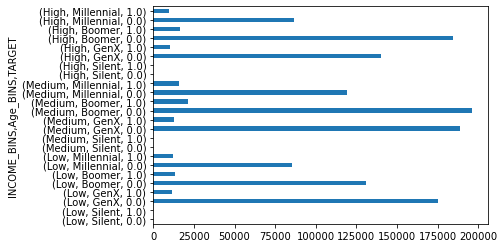

In [86]:
df3.groupby(by=['INCOME_BINS','Age_BINS','TARGET']).count()['SK_ID_CURR'].plot(kind='barh')

In [87]:
df3.groupby(by=['INCOME_BINS','Age_BINS','NAME_EDUCATION_TYPE','TARGET']).count()['SK_ID_CURR']

INCOME_BINS  Age_BINS    NAME_EDUCATION_TYPE            TARGET
Low          Silent      Academic degree                0.0           NaN
                                                        1.0           NaN
                         Higher education               0.0           6.0
                                                        1.0           NaN
                         Incomplete higher              0.0           NaN
                                                                   ...   
High         Millennial  Incomplete higher              1.0         702.0
                         Lower secondary                0.0         448.0
                                                        1.0          55.0
                         Secondary / secondary special  0.0       42089.0
                                                        1.0        6042.0
Name: SK_ID_CURR, Length: 120, dtype: float64

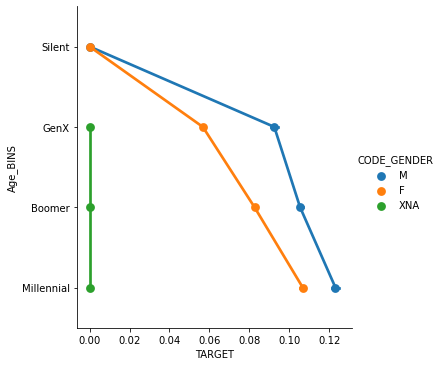

In [88]:
sns.factorplot('TARGET','Age_BINS',data=df3,hue='CODE_GENDER')

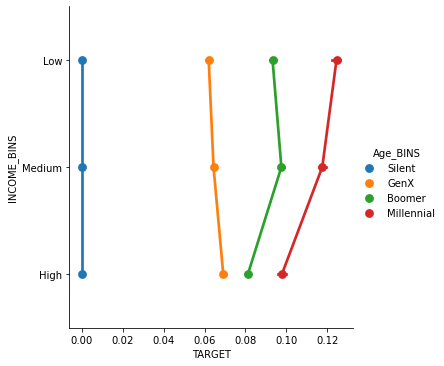

In [89]:
sns.factorplot('TARGET','INCOME_BINS',data=df3,hue='Age_BINS')


In [90]:
df2['NAME_TYPE_SUITE'].unique()

array([nan, 'Unaccompanied', 'Spouse, partner', 'Family', 'Children',
       'Other_B', 'Other_A', 'Group of people'], dtype=object)

In [91]:
df3.groupby(by=['Age_BINS',df2['NAME_TYPE_SUITE'],'TARGET']).count()['SK_ID_CURR']

Age_BINS    NAME_TYPE_SUITE  TARGET
Silent      Children         0.0            2.0
                             1.0            NaN
            Family           0.0            7.0
                             1.0            NaN
            Group of people  0.0            NaN
                             1.0            NaN
            Other_A          0.0            NaN
                             1.0            NaN
            Other_B          0.0            NaN
                             1.0            NaN
            Spouse, partner  0.0            5.0
                             1.0            NaN
            Unaccompanied    0.0           17.0
                             1.0            NaN
GenX        Children         0.0         9525.0
                             1.0          708.0
            Family           0.0        64537.0
                             1.0         4440.0
            Group of people  0.0          686.0
                             1.0           51.0
    

In [92]:
df3.groupby(by=['Age_BINS','OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR']

Age_BINS    OCCUPATION_TYPE       TARGET
Silent      Accountants           0.0          NaN
                                  1.0          NaN
            Cleaning staff        0.0          NaN
                                  1.0          NaN
            Cooking staff         0.0          NaN
                                             ...  
Millennial  Secretaries           1.0        183.0
            Security staff        0.0       4274.0
                                  1.0        803.0
            Waiters/barmen staff  0.0       2378.0
                                  1.0        352.0
Name: SK_ID_CURR, Length: 144, dtype: float64

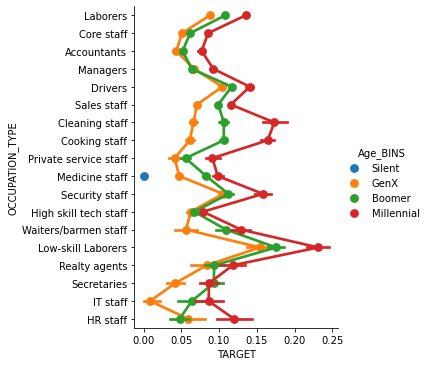

In [93]:
sns.factorplot('TARGET','OCCUPATION_TYPE',data=df3,hue='Age_BINS')

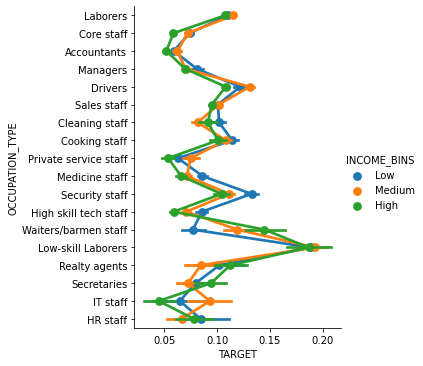

In [94]:
sns.factorplot('TARGET','OCCUPATION_TYPE',data=df3,hue='INCOME_BINS')

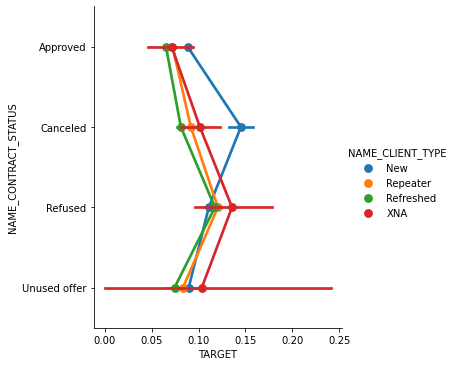

In [95]:
sns.factorplot('TARGET','NAME_CONTRACT_STATUS',data=df3,hue='NAME_CLIENT_TYPE')

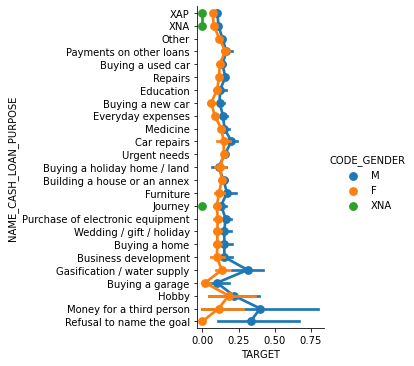

In [96]:
sns.factorplot('TARGET','NAME_CASH_LOAN_PURPOSE',data=df3,hue='CODE_GENDER')

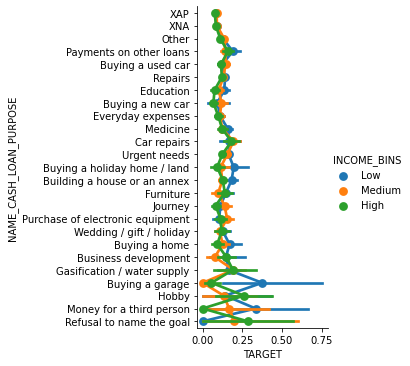

In [97]:
sns.factorplot('TARGET','NAME_CASH_LOAN_PURPOSE',data=df3,hue='INCOME_BINS')